In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from scipy.spatial.distance import cityblock
import scipy.stats as stats
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA


warnings.filterwarnings('ignore')

In [2]:
PM10=pd.read_csv("PM10_E43.csv",index_col = "DATETIME")
PM10.rename(columns = {'mg/m^3_43':'mg/m^3'}, inplace = True)
PM10

,mg/m^3
DATETIME,
2019-07-01 01:00:00,42.0
2019-07-01 02:00:00,38.0
2019-07-01 03:00:00,34.0
2019-07-01 04:00:00,34.0
2019-07-01 05:00:00,36.0
...,...
2022-06-30 20:00:00,57.0
2022-06-30 21:00:00,39.0
2022-06-30 22:00:00,44.0


In [3]:
PM10.describe()

,mg/m^3
count,24314.000000
mean,26.595583
std,16.898428
min,1.000000
25%,16.000000
50%,24.000000
75%,33.000000
max,543.000000


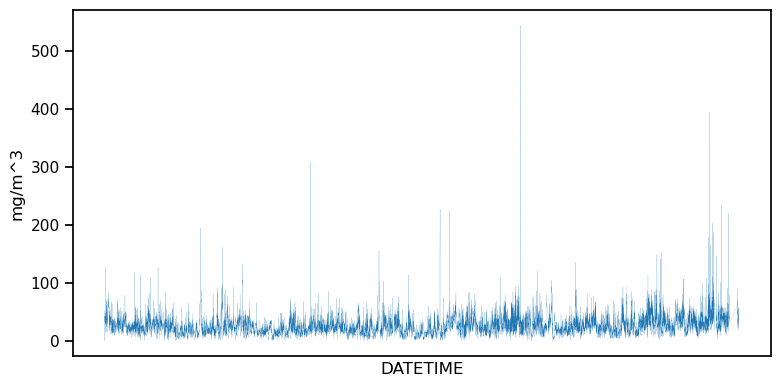

In [4]:
plt.figure(figsize=(9,4.5))
sns.set_context("notebook")
sns.axes_style("whitegrid")
sns.lineplot(data=PM10["mg/m^3"],linewidth=.1)
plt.xticks(ticks=[])
plt.show()

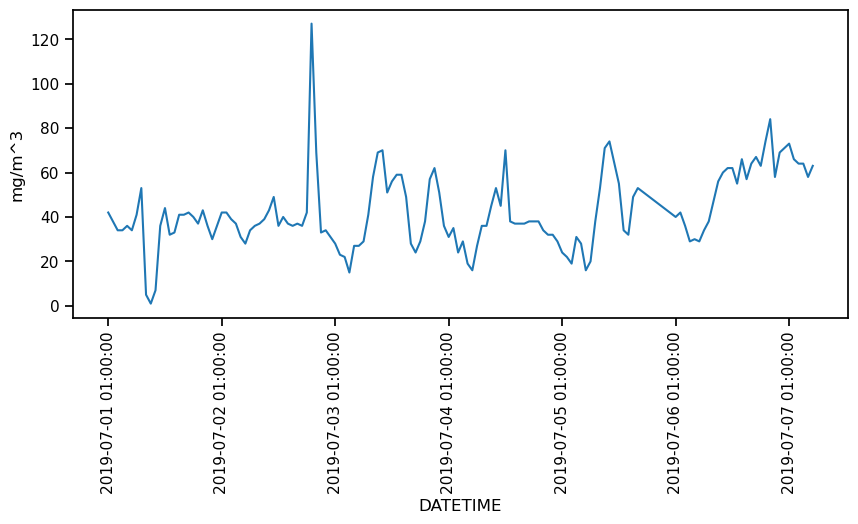

In [5]:
plt.figure(figsize=(10,4))
sns.set_context("notebook")
sns.axes_style("whitegrid")
sns.lineplot(data=PM10["mg/m^3"][:168])
plt.xticks(ticks=range(0,168,24), rotation=90)

plt.show()

## Missing values analysis

In [6]:
# % of missing values
1-PM10.count()/len(PM10)

mg/m^3    0.061091
dtype: float64

In [6]:
#PM10[ "mg/m^3_acum_NAN"]= 0

#for j in range(1,len(PM10)):

    #if PM10["mg/m^3"].isna()[j] == True :
        #PM10[ "mg/m^3_acum_NAN"][j] = PM10[ "mg/m^3_acum_NAN"][j-1]+1   
        
        
    #else:
        #PM10[ "mg/m^3_acum_NAN"][j] = 0

In [7]:
#plt.figure(figsize=(9,4.5))
#sns.set_context("notebook")
#sns.axes_style("whitegrid")
#sns.lineplot(data=PM10["mg/m^3_acum_NAN"],linewidth=.1)
#plt.show()

In [8]:
#PM10[ "mg/m^3_peaks_acum_NAN"]= PM10[ "mg/m^3_acum_NAN"]


#for j in range(1,len(PM10)):

    #if (PM10["mg/m^3_acum_NAN"][j] == 0) or (PM10["mg/m^3_acum_NAN"][j+1] > 0) :
          
        #PM10[ "mg/m^3_peaks_acum_NAN"][j] = 0

In [9]:
#plt.figure(figsize=(9,4.5))
#sns.set_context("notebook")
#sns.axes_style("whitegrid")
#sns.lineplot(data=PM10["mg/m^3_peaks_acum_NAN"],linewidth=.1)
#plt.show()

In [10]:
#PM10["mg/m^3_peaks_acum_NAN"].value_counts().sort_index()

In [11]:
#plt.figure(figsize=(9,4.5))
#sns.set_context("notebook")
#sns.axes_style("whitegrid")
#sns.lineplot(data=PM10[:200]["mg/m^3_acum_NAN"],linewidth=.1)
#plt.show()

In [7]:
PM10["mg/m^3_im"] = PM10["mg/m^3"].fillna(PM10["mg/m^3"].mean())
PM10

,mg/m^3,mg/m^3_im
DATETIME,,
2019-07-01 01:00:00,42.0,42.0
2019-07-01 02:00:00,38.0,38.0
2019-07-01 03:00:00,34.0,34.0
2019-07-01 04:00:00,34.0,34.0
2019-07-01 05:00:00,36.0,36.0
...,...,...
2022-06-30 20:00:00,57.0,57.0
2022-06-30 21:00:00,39.0,39.0
2022-06-30 22:00:00,44.0,44.0


In [8]:
size = int(len(PM10["mg/m^3_im"])*.8)

train, test = PM10["mg/m^3_im"].iloc[:size], PM10["mg/m^3_im"].iloc[size:]

train.to_csv("PM10_E43_train.csv")
train.to_csv("PM10_E43_test.csv")

## 24h mean analysis

In [9]:
PM10["mg/m^3_im_24h"] = np.nan

for j in range(23, len(PM10)):

    PM10[ "mg/m^3_im_24h"][j] = PM10["mg/m^3_im"][j-23:j+1].mean()
    
PM10

,mg/m^3,mg/m^3_im,mg/m^3_im_24h
DATETIME,,,
2019-07-01 01:00:00,42.0,42.0,NaN
2019-07-01 02:00:00,38.0,38.0,NaN
2019-07-01 03:00:00,34.0,34.0,NaN
2019-07-01 04:00:00,34.0,34.0,NaN
2019-07-01 05:00:00,36.0,36.0,NaN
...,...,...,...
2022-06-30 20:00:00,57.0,57.0,35.208333
2022-06-30 21:00:00,39.0,39.0,34.458333
2022-06-30 22:00:00,44.0,44.0,34.416667


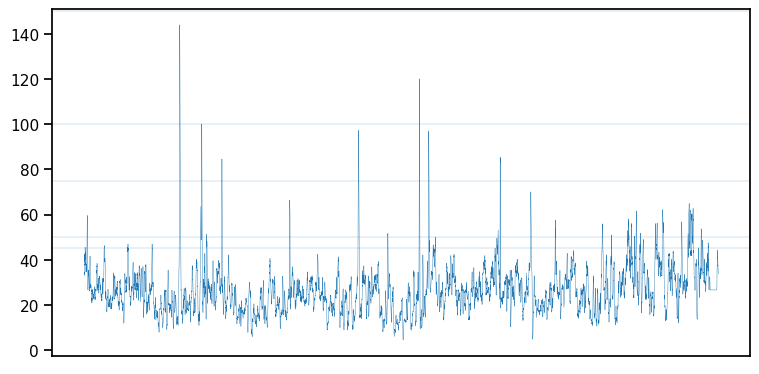

In [10]:
plt.figure(figsize=(9,4.5))
#sns.set_context("notebook")
#sns.axes_style("whitegrid")
#graph = sns.lineplot(data=NO2["mg/m^3_43_24h"],linewidth=.1)

graph = plt.plot(PM10["mg/m^3_im_24h"],linewidth=.3)

plt.axhline(y=150,linewidth=.15)
plt.axhline(y=100,linewidth=.15)
plt.axhline(y=75,linewidth=.15)
plt.axhline(y=50,linewidth=.15)
plt.axhline(y=45,linewidth=.15)
plt.xticks(ticks=[])

plt.show()

In [11]:
PM10["AQG"] = "NA"

for j in range(len(PM10)):
    if PM10[ "mg/m^3_im_24h"][j]<= 45:
        PM10["AQG"][j] = "+"
    elif 45<PM10[ "mg/m^3_im_24h"][j]<= 50:
        PM10["AQG"][j] = "I1"
    elif 50<PM10[ "mg/m^3_im_24h"][j]<= 75:
        PM10["AQG"][j] = "I2"
    elif 75<PM10[ "mg/m^3_im_24h"][j]<= 100:
        PM10["AQG"][j] = "I3"
    elif 100<PM10[ "mg/m^3_im_24h"][j]<= 150:
        PM10["AQG"][j] = "I4"   
    elif PM10[ "mg/m^3_im_24h"][j]> 150:
        PM10["AQG"][j] = "-"    
    
PM10["AQG"].value_counts()

+     24649
I2      596
I1      466
I3      122
I4       40
NA       23
Name: AQG, dtype: int64

In [13]:
h1907_1910 = PM10[PM10.index<"2019-11"]["AQG"].value_counts()/len(PM10[PM10.index<"2019-11"]["AQG"])*100
h1911_2002 = PM10[("2019-10"< PM10.index)&(PM10.index<"2020-03")]["AQG"].value_counts()/len(PM10[("2019-10"< PM10.index)&(PM10.index<"2020-03")]["AQG"])*100

h2003_2006 = PM10[("2020-02"< PM10.index)&(PM10.index<"2020-07")]["AQG"].value_counts()/len(PM10[("2020-02"< PM10.index)&(PM10.index<"2020-07")]["AQG"])*100
h2007_2010 = PM10[("2020-06"< PM10.index)&(PM10.index<"2020-11")]["AQG"].value_counts()/len(PM10[("2020-06"< PM10.index)&(PM10.index<"2020-11")]["AQG"])*100
h2011_2102 = PM10[("2020-10"< PM10.index)&(PM10.index<"2021-03")]["AQG"].value_counts()/len(PM10[("2020-10"< PM10.index)&(PM10.index<"2021-03")]["AQG"])*100

h2103_2106 = PM10[("2021-02"< PM10.index)&(PM10.index<"2021-07")]["AQG"].value_counts()/len(PM10[("2021-02"< PM10.index)&(PM10.index<"2021-07")]["AQG"])*100
h2107_2110 = PM10[("2021-06"< PM10.index)&(PM10.index<"2021-11")]["AQG"].value_counts()/len(PM10[("2021-06"< PM10.index)&(PM10.index<"2021-11")]["AQG"])*100
h2111_2202 = PM10[("2021-10"< PM10.index)&(PM10.index<"2022-03")]["AQG"].value_counts()/len(PM10[("2021-10"< PM10.index)&(PM10.index<"2022-03")]["AQG"])*100

h2203_2206 = PM10[("2022-02"< PM10.index)]["AQG"].value_counts()/len(PM10[("2022-02"< PM10.index)]["AQG"])*100

In [16]:
data = {'24h1907-1910': h1907_1910,'24h1911-2002': h1911_2002,
        '24h2003-2006': h2003_2006,'24h2007-2010': h2007_2010,'24h2011-2102': h2011_2102,
        '24h2103-2106': h2103_2106,'24h2106-2109': h2107_2110,'24h2111-2202': h2111_2202,
        '24h2203-2206': h2203_2206       
       }
 
# Create DataFrame
per24h = pd.DataFrame(data)
 
# Print the output.
per24h

,24h1907-1910,24h1911-2002,24h2003-2006,24h2007-2010,24h2011-2102,24h2103-2106,24h2106-2109,24h2111-2202,24h2203-2206
+,97.174143,95.157658,97.958057,98.000000,95.833333,94.861111,96.023965,93.166667,85.726187
I1,1.412928,1.097973,0.579470,0.083333,0.850340,2.416667,1.470588,3.388889,6.248264
I2,0.600495,2.139640,1.103753,1.111111,1.303855,0.944444,1.906318,3.444444,8.025548
I3,NaN,0.872748,0.358720,0.805556,1.615646,1.388889,0.599129,NaN,NaN
I4,NaN,0.731982,NaN,NaN,0.396825,0.388889,NaN,NaN,NaN
NA,0.812434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 24h train forecasting

In [17]:
size = int(len(PM10["mg/m^3_im_24h"])*.8)

train_24, test_24 = PM10["mg/m^3_im_24h"].iloc[:size], PM10["mg/m^3_im_24h"].iloc[size:]

In [18]:
tr_PM10_24_00 = train_24.loc[[x for x in train_24.index if x[-8:]=='00:00:00']]
tr_PM10_24_01 = train_24.loc[[x for x in train_24.index if x[-8:]=='01:00:00']]
tr_PM10_24_02 = train_24.loc[[x for x in train_24.index if x[-8:]=='02:00:00']]
tr_PM10_24_03 = train_24.loc[[x for x in train_24.index if x[-8:]=='03:00:00']]
tr_PM10_24_04 = train_24.loc[[x for x in train_24.index if x[-8:]=='04:00:00']]
tr_PM10_24_05 = train_24.loc[[x for x in train_24.index if x[-8:]=='05:00:00']]
tr_PM10_24_06 = train_24.loc[[x for x in train_24.index if x[-8:]=='06:00:00']]
tr_PM10_24_07 = train_24.loc[[x for x in train_24.index if x[-8:]=='07:00:00']]
tr_PM10_24_08 = train_24.loc[[x for x in train_24.index if x[-8:]=='08:00:00']]
tr_PM10_24_09 = train_24.loc[[x for x in train_24.index if x[-8:]=='09:00:00']]
tr_PM10_24_10 = train_24.loc[[x for x in train_24.index if x[-8:]=='10:00:00']]
tr_PM10_24_11 = train_24.loc[[x for x in train_24.index if x[-8:]=='11:00:00']]
tr_PM10_24_12 = train_24.loc[[x for x in train_24.index if x[-8:]=='12:00:00']]
tr_PM10_24_13 = train_24.loc[[x for x in train_24.index if x[-8:]=='13:00:00']]
tr_PM10_24_14 = train_24.loc[[x for x in train_24.index if x[-8:]=='14:00:00']]
tr_PM10_24_15 = train_24.loc[[x for x in train_24.index if x[-8:]=='15:00:00']]
tr_PM10_24_16 = train_24.loc[[x for x in train_24.index if x[-8:]=='16:00:00']]
tr_PM10_24_17 = train_24.loc[[x for x in train_24.index if x[-8:]=='17:00:00']]
tr_PM10_24_18 = train_24.loc[[x for x in train_24.index if x[-8:]=='18:00:00']]
tr_PM10_24_19 = train_24.loc[[x for x in train_24.index if x[-8:]=='19:00:00']]
tr_PM10_24_20 = train_24.loc[[x for x in train_24.index if x[-8:]=='20:00:00']]
tr_PM10_24_21 = train_24.loc[[x for x in train_24.index if x[-8:]=='21:00:00']]
tr_PM10_24_22 = train_24.loc[[x for x in train_24.index if x[-8:]=='22:00:00']]
tr_PM10_24_23 = train_24.loc[[x for x in train_24.index if x[-8:]=='23:00:00']]

In [19]:
tr_PM10_24_00[1:].to_csv("tr_PM10_24h_00.csv")
tr_PM10_24_01[1:].to_csv("tr_PM10_24h_01.csv")
tr_PM10_24_02[1:].to_csv("tr_PM10_24h_02.csv")
tr_PM10_24_03[1:].to_csv("tr_PM10_24h_03.csv")
tr_PM10_24_04[1:].to_csv("tr_PM10_24h_04.csv")
tr_PM10_24_05[1:].to_csv("tr_PM10_24h_05.csv")
tr_PM10_24_06[1:].to_csv("tr_PM10_24h_06.csv")
tr_PM10_24_07[1:].to_csv("tr_PM10_24h_07.csv")
tr_PM10_24_08[1:].to_csv("tr_PM10_24h_08.csv")
tr_PM10_24_09[1:].to_csv("tr_PM10_24h_09.csv")
tr_PM10_24_10[1:].to_csv("tr_PM10_24h_10.csv")
tr_PM10_24_11[1:].to_csv("tr_PM10_24h_11.csv")
tr_PM10_24_12[1:].to_csv("tr_PM10_24h_12.csv")
tr_PM10_24_13[1:].to_csv("tr_PM10_24h_13.csv")
tr_PM10_24_14[1:].to_csv("tr_PM10_24h_14.csv")
tr_PM10_24_15[1:].to_csv("tr_PM10_24h_15.csv")
tr_PM10_24_16[1:].to_csv("tr_PM10_24h_16.csv")
tr_PM10_24_17[1:].to_csv("tr_PM10_24h_17.csv")
tr_PM10_24_18[1:].to_csv("tr_PM10_24h_18.csv")
tr_PM10_24_19[1:].to_csv("tr_PM10_24h_19.csv")
tr_PM10_24_20[1:].to_csv("tr_PM10_24h_20.csv")
tr_PM10_24_21[1:].to_csv("tr_PM10_24h_21.csv")
tr_PM10_24_22[1:].to_csv("tr_PM10_24h_22.csv")
tr_PM10_24_23[1:].to_csv("tr_PM10_24h_23.csv")
tr_PM10_24_02[1:].to_csv("tr_PM10_24h_02.csv")
tr_PM10_24_03[1:].to_csv("tr_PM10_24h_03.csv")
tr_PM10_24_04[1:].to_csv("tr_PM10_24h_04.csv")
tr_PM10_24_05[1:].to_csv("tr_PM10_24h_05.csv")
tr_PM10_24_06[1:].to_csv("tr_PM10_24h_06.csv")
tr_PM10_24_07[1:].to_csv("tr_PM10_24h_07.csv")
tr_PM10_24_08[1:].to_csv("tr_PM10_24h_08.csv")
tr_PM10_24_09[1:].to_csv("tr_PM10_24h_09.csv")
tr_PM10_24_10[1:].to_csv("tr_PM10_24h_10.csv")
tr_PM10_24_11[1:].to_csv("tr_PM10_24h_11.csv")
tr_PM10_24_12[1:].to_csv("tr_PM10_24h_12.csv")
tr_PM10_24_13[1:].to_csv("tr_PM10_24h_13.csv")
tr_PM10_24_14[1:].to_csv("tr_PM10_24h_14.csv")
tr_PM10_24_15[1:].to_csv("tr_PM10_24h_15.csv")
tr_PM10_24_16[1:].to_csv("tr_PM10_24h_16.csv")
tr_PM10_24_17[1:].to_csv("tr_PM10_24h_17.csv")
tr_PM10_24_18[1:].to_csv("tr_PM10_24h_18.csv")
tr_PM10_24_19[1:].to_csv("tr_PM10_24h_19.csv")
tr_PM10_24_20[1:].to_csv("tr_PM10_24h_20.csv")
tr_PM10_24_21[1:].to_csv("tr_PM10_24h_21.csv")
tr_PM10_24_22[1:].to_csv("tr_PM10_24h_22.csv")
tr_PM10_24_23[1:].to_csv("tr_PM10_24h_23.csv")

In [20]:
te_PM10_24_00 = test_24.loc[[x for x in test_24.index if x[-8:]=='00:00:00']]
te_PM10_24_01 = test_24.loc[[x for x in test_24.index if x[-8:]=='01:00:00']]
te_PM10_24_02 = test_24.loc[[x for x in test_24.index if x[-8:]=='02:00:00']]
te_PM10_24_03 = test_24.loc[[x for x in test_24.index if x[-8:]=='03:00:00']]
te_PM10_24_04 = test_24.loc[[x for x in test_24.index if x[-8:]=='04:00:00']]
te_PM10_24_05 = test_24.loc[[x for x in test_24.index if x[-8:]=='05:00:00']]
te_PM10_24_06 = test_24.loc[[x for x in test_24.index if x[-8:]=='06:00:00']]
te_PM10_24_07 = test_24.loc[[x for x in test_24.index if x[-8:]=='07:00:00']]
te_PM10_24_08 = test_24.loc[[x for x in test_24.index if x[-8:]=='08:00:00']]
te_PM10_24_09 = test_24.loc[[x for x in test_24.index if x[-8:]=='09:00:00']]
te_PM10_24_10 = test_24.loc[[x for x in test_24.index if x[-8:]=='10:00:00']]
te_PM10_24_11 = test_24.loc[[x for x in test_24.index if x[-8:]=='11:00:00']]
te_PM10_24_12 = test_24.loc[[x for x in test_24.index if x[-8:]=='12:00:00']]
te_PM10_24_13 = test_24.loc[[x for x in test_24.index if x[-8:]=='13:00:00']]
te_PM10_24_14 = test_24.loc[[x for x in test_24.index if x[-8:]=='14:00:00']]
te_PM10_24_15 = test_24.loc[[x for x in test_24.index if x[-8:]=='15:00:00']]
te_PM10_24_16 = test_24.loc[[x for x in test_24.index if x[-8:]=='16:00:00']]
te_PM10_24_17 = test_24.loc[[x for x in test_24.index if x[-8:]=='17:00:00']]
te_PM10_24_18 = test_24.loc[[x for x in test_24.index if x[-8:]=='18:00:00']]
te_PM10_24_19 = test_24.loc[[x for x in test_24.index if x[-8:]=='19:00:00']]
te_PM10_24_20 = test_24.loc[[x for x in test_24.index if x[-8:]=='20:00:00']]
te_PM10_24_21 = test_24.loc[[x for x in test_24.index if x[-8:]=='21:00:00']]
te_PM10_24_22 = test_24.loc[[x for x in test_24.index if x[-8:]=='22:00:00']]
te_PM10_24_23 = test_24.loc[[x for x in test_24.index if x[-8:]=='23:00:00']]

In [21]:
te_PM10_24_00.to_csv("te_PM10_24h_00.csv")
te_PM10_24_01.to_csv("te_PM10_24h_01.csv")
te_PM10_24_02.to_csv("te_PM10_24h_02.csv")
te_PM10_24_03.to_csv("te_PM10_24h_03.csv")
te_PM10_24_04.to_csv("te_PM10_24h_04.csv")
te_PM10_24_05.to_csv("te_PM10_24h_05.csv")
te_PM10_24_06.to_csv("te_PM10_24h_06.csv")
te_PM10_24_07.to_csv("te_PM10_24h_07.csv")
te_PM10_24_08.to_csv("te_PM10_24h_08.csv")
te_PM10_24_09.to_csv("te_PM10_24h_09.csv")
te_PM10_24_10.to_csv("te_PM10_24h_10.csv")
te_PM10_24_11.to_csv("te_PM10_24h_11.csv")
te_PM10_24_12.to_csv("te_PM10_24h_12.csv")
te_PM10_24_13.to_csv("te_PM10_24h_13.csv")
te_PM10_24_14.to_csv("te_PM10_24h_14.csv")
te_PM10_24_15.to_csv("te_PM10_24h_15.csv")
te_PM10_24_16.to_csv("te_PM10_24h_16.csv")
te_PM10_24_17.to_csv("te_PM10_24h_17.csv")
te_PM10_24_18.to_csv("te_PM10_24h_18.csv")
te_PM10_24_19.to_csv("te_PM10_24h_19.csv")
te_PM10_24_20.to_csv("te_PM10_24h_20.csv")
te_PM10_24_21.to_csv("te_PM10_24h_21.csv")
te_PM10_24_22.to_csv("te_PM10_24h_22.csv")
te_PM10_24_23.to_csv("te_PM10_24h_23.csv")

In [22]:
test_24=test_24.to_frame()
test_24

,mg/m^3_im_24h
DATETIME,
2021-11-27 05:00:00,13.458333
2021-11-27 06:00:00,13.458333
2021-11-27 07:00:00,13.500000
2021-11-27 08:00:00,13.458333
2021-11-27 09:00:00,13.500000
...,...
2022-06-30 20:00:00,35.208333
2022-06-30 21:00:00,34.458333
2022-06-30 22:00:00,34.416667


In [23]:
test_24["fr_mg/m^3_im_24h"]=''

for j in range(0,216):
    
    test_24["fr_mg/m^3_im_24h"][24*j] = pd.read_csv("fr_PM10_24H_05.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][1+24*j] = pd.read_csv("fr_PM10_24H_06.csv")["x"][j]    
    test_24["fr_mg/m^3_im_24h"][2+24*j] = pd.read_csv("fr_PM10_24H_07.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][3+24*j] = pd.read_csv("fr_PM10_24H_08.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][4+24*j] = pd.read_csv("fr_PM10_24H_09.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][5+24*j] = pd.read_csv("fr_PM10_24H_10.csv")["x"][j]    
    test_24["fr_mg/m^3_im_24h"][6+24*j] = pd.read_csv("fr_PM10_24H_11.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][7+24*j] = pd.read_csv("fr_PM10_24H_12.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][8+24*j] = pd.read_csv("fr_PM10_24H_13.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][9+24*j] = pd.read_csv("fr_PM10_24H_14.csv")["x"][j]    
    test_24["fr_mg/m^3_im_24h"][10+24*j] = pd.read_csv("fr_PM10_24H_15.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][11+24*j] = pd.read_csv("fr_PM10_24H_16.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][12+24*j] = pd.read_csv("fr_PM10_24H_17.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][13+24*j] = pd.read_csv("fr_PM10_24H_18.csv")["x"][j]    
    test_24["fr_mg/m^3_im_24h"][14+24*j] = pd.read_csv("fr_PM10_24H_19.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][15+24*j] = pd.read_csv("fr_PM10_24H_20.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][16+24*j] = pd.read_csv("fr_PM10_24H_21.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][17+24*j] = pd.read_csv("fr_PM10_24H_22.csv")["x"][j]    
    test_24["fr_mg/m^3_im_24h"][18+24*j] = pd.read_csv("fr_PM10_24H_23.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][19+24*j] = pd.read_csv("fr_PM10_24H_00.csv")["x"][j]

for j in range(0,215):
    test_24["fr_mg/m^3_im_24h"][20+24*j] = pd.read_csv("fr_PM10_24H_01.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][21+24*j] = pd.read_csv("fr_PM10_24H_02.csv")["x"][j]    
    test_24["fr_mg/m^3_im_24h"][22+24*j] = pd.read_csv("fr_PM10_24H_03.csv")["x"][j]
    test_24["fr_mg/m^3_im_24h"][23+24*j] = pd.read_csv("fr_PM10_24H_04.csv")["x"][j]               

In [24]:
test_24

,mg/m^3_im_24h,fr_mg/m^3_im_24h
DATETIME,,
2021-11-27 05:00:00,13.458333,23.649742
2021-11-27 06:00:00,13.458333,23.670101
2021-11-27 07:00:00,13.500000,23.647406
2021-11-27 08:00:00,13.458333,23.607556
2021-11-27 09:00:00,13.500000,23.598962
...,...,...
2022-06-30 20:00:00,35.208333,33.434278
2022-06-30 21:00:00,34.458333,33.393662
2022-06-30 22:00:00,34.416667,33.292801


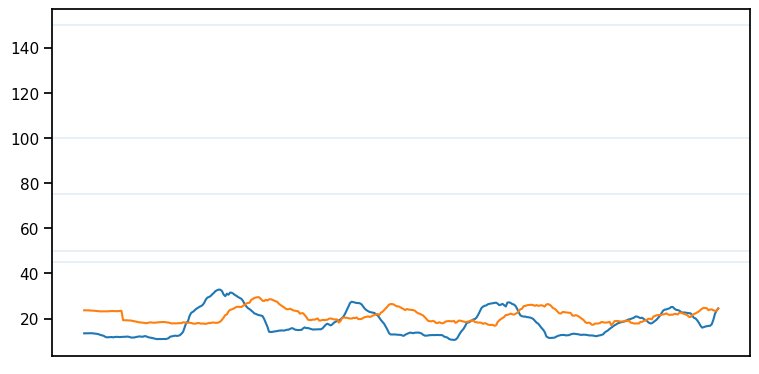

In [28]:
plt.figure(figsize=(9,4.5))
plt.plot(test_24[0:392])
plt.axhline(y=150,linewidth=.15)
plt.axhline(y=100,linewidth=.15)
plt.axhline(y=75,linewidth=.15)
plt.axhline(y=50,linewidth=.15)
plt.axhline(y=45,linewidth=.15)
plt.xticks(ticks=[])
plt.show()

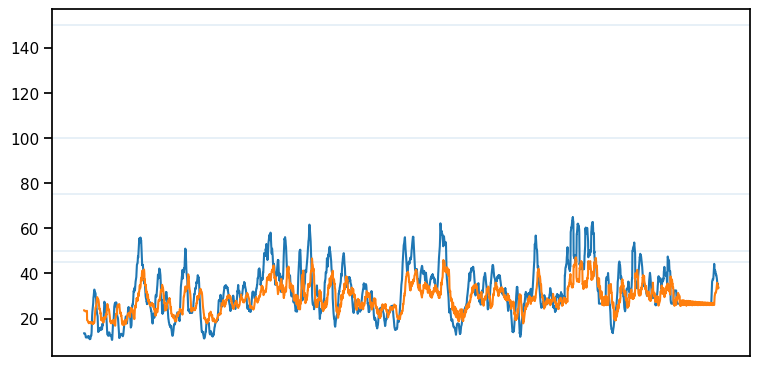

In [27]:
plt.figure(figsize=(9,4.5))
plt.plot(test_24)
plt.axhline(y=150,linewidth=.15)
plt.axhline(y=100,linewidth=.15)
plt.axhline(y=75,linewidth=.15)
plt.axhline(y=50,linewidth=.15)
plt.axhline(y=45,linewidth=.15)
plt.xticks(ticks=[])
plt.show()

## 1y mean analysis

In [29]:
PM10["mg/m^3_im_1y"] = np.nan

for j in range(8759, len(PM10)):

    PM10[ "mg/m^3_im_1y"][j] = PM10["mg/m^3_im"][j-8759:j+1].mean()
    
PM10

,mg/m^3,mg/m^3_im,mg/m^3_im_24h,AQG,mg/m^3_im_1y
DATETIME,,,,,
2019-07-01 01:00:00,42.0,42.0,NaN,NA,NaN
2019-07-01 02:00:00,38.0,38.0,NaN,NA,NaN
2019-07-01 03:00:00,34.0,34.0,NaN,NA,NaN
2019-07-01 04:00:00,34.0,34.0,NaN,NA,NaN
2019-07-01 05:00:00,36.0,36.0,NaN,NA,NaN
...,...,...,...,...,...
2022-06-30 20:00:00,57.0,57.0,35.208333,+,29.489106
2022-06-30 21:00:00,39.0,39.0,34.458333,+,29.490362
2022-06-30 22:00:00,44.0,44.0,34.416667,+,29.492417


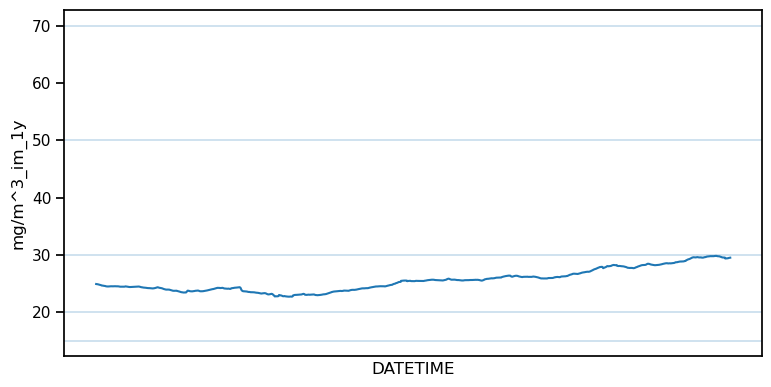

In [30]:
plt.figure(figsize=(9,4.5))
sns.set_context("notebook")
sns.axes_style("whitegrid")
graph = sns.lineplot(data=PM10["mg/m^3_im_1y"])
plt.xticks(ticks=[])
graph.axhline(70,linewidth=.3)
graph.axhline(50,linewidth=.3)
graph.axhline(30,linewidth=.3)
graph.axhline(20,linewidth=.3)
graph.axhline(15,linewidth=.3)

plt.show()

## ARIMA forecasting

In [17]:
size = int(len(PM10["mg/m^3_im"])*.8)

train, test = PM10["mg/m^3_im"].iloc[:size], PM10["mg/m^3_im"].iloc[size:]
train.to_csv("PM10_E43_train.csv")
test.to_csv("PM10_E43_test.csv")

In [18]:
step_fit = auto_arima(train,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=25.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=151882.803, Time=0.56 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=151860.647, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=151854.696, Time=1.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=151880.803, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.88 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=151582.323, Time=3.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=150088.782, Time=14.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=150090.027, Time=19.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=151376.539, Time=5.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=150089.892, Time=17.95 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=35.39 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=150086.796, Time=3.30 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=151580.323, Time=1.18 sec
 ARIMA(1,1,1)(0,0,0)[

In [19]:
step_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                20716
Model:               SARIMAX(1, 1, 4)   Log Likelihood              -75029.687
Date:                Sat, 09 Jul 2022   AIC                         150071.375
Time:                        17:46:51   BIC                         150119.006
Sample:                             0   HQIC                        150086.932
                              - 20716                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7682      0.003    222.096      0.000       0.761       0.775
ma.L1         -0.8860      0.004   -239.439      0.000      -0.893      -0.879
ma.L2         -0.0786      0.002    -52.151      0.000      -0.082      -0.076
ma.L3          0.0211      0.003      8.346      0.000       0.016       0.026
ma.L4         -0.0407      0.002    -17.839      0.000      -0.045      -0.036
sigma2        81.9422      0.088    935.577      0.000      81.771      82.114
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          29273340.63
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             4.49
Prob(H) (two-sided):                  0.02   Kurtosis:                       186.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
model = ARIMA(train,order=(2,1,2))
model = model.fit(method='mle')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.mg/m^3_im   No. Observations:                25895
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -95404.318
Method:                           mle   S.D. of innovations              9.634
Date:                Tue, 05 Jul 2022   AIC                         190820.637
Time:                        16:37:05   BIC                         190869.608
Sample:                             1   HQIC                        190836.460
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0002      0.005      0.050      0.960      -0.009       0.009
ar.L1.D.mg/m^3_im     0.2480      0.112      2.209      0.027       0.028       0.468
ar.L2.D.mg/m^3_im     0.4086      0.089      4.579      0.000       0.234       0.584
ma.L1.D.mg/m^3_im    -0.4316      0.111     -3.895      0.000      -0.649      -0.214
ma.L2.D.mg/m^3_im    -0.5416      0.109     -4.956      0.000      -0.756      -0.327
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2900           +0.0000j            1.2900            0.0000
AR.2           -1.8970           +0.0000j            1.8970            0.5000
MA.1            1.0175           +0.0000j            1.0175            0.0000
MA.2           -1.8144           +0.0000j            1.8144            0.5000
-----------------------------------------------------------------------------
"""

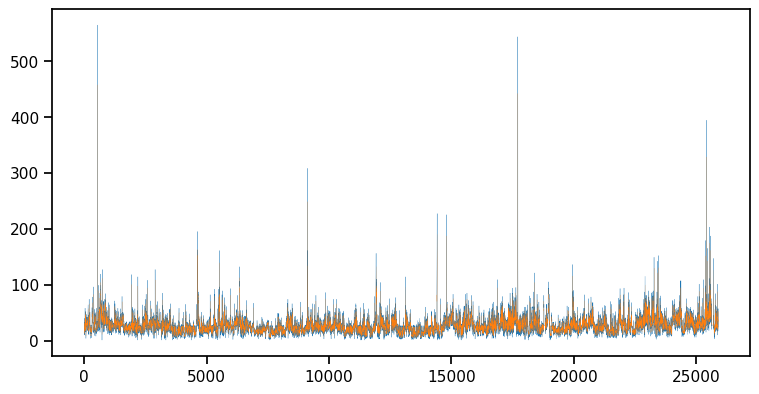

In [21]:
pred=model.predict(typ='levels')
plt.figure(figsize=(9,4.5))


plt.plot(PM10["mg/m^3_im"], linewidth =.2)
plt.plot(pred, linewidth=.1)
plt.show()

In [22]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(pred,PM10["mg/m^3_im"][2:])

20.096757374975276

In [20]:
test_forecast =pd.read_csv("PM10testforecast.csv")
test_forecast

,Unnamed: 0,x
0,1,20.979000
1,2,21.301307
2,3,28.240678
3,4,38.119305
4,5,41.942909
...,...,...
5175,5176,36.551826
5176,5177,33.677454
5177,5178,37.383163
5178,5179,31.519290


In [21]:
testvsforecast=pd.DataFrame(list(zip(list(test),list(test_forecast["x"]))),columns=["test","forecast"])
testvsforecast

,test,forecast
0,21.0,20.979000
1,28.0,21.301307
2,39.0,28.240678
3,43.0,38.119305
4,57.0,41.942909
...,...,...
5175,34.0,36.551826
5176,39.0,33.677454
5177,32.0,37.383163
5178,30.0,31.519290


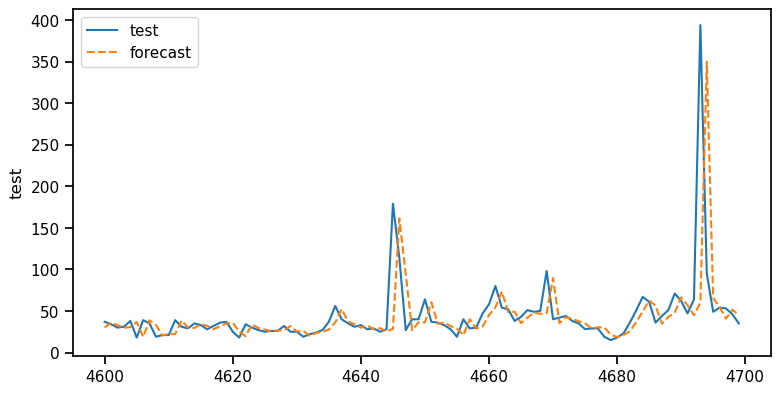

In [28]:
plt.figure(figsize=(9,4.5))
sns.set_context("notebook")
sns.axes_style("whitegrid")
sns.lineplot(data=testvsforecast["test"][4600:4700], label="test")
sns.lineplot(data=testvsforecast["forecast"][4600:4700], label ="forecast", linestyle='--')

plt.show()